# Cryptocurrency Clusters

   You are on the Advisory Services Team of a financial consultancy. One of your clients, a prominent investment bank, is interested in offering a new cryptocurrency investment portfolio for its customers. The company, however, is lost in the vast universe of cryptocurrencies. They’ve asked you to create a report that includes what cryptocurrencies are on the trading market and determine whether they can be grouped to create a classification system for this new investment.


   You have been handed raw data, so you will first need to process it to fit the machine learning models. Since there is no known classification system, you will need to use unsupervised learning. You will use several clustering algorithms to explore whether the cryptocurrencies can be grouped together with other similar cryptocurrencies. You will use data visualization to share your findings with the investment bank.

In [1]:
#imports
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Preparation

In [2]:
#read csv
crypto_file="crypto_data.csv"

In [3]:
#Load data
df=pd.read_csv(crypto_file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#Discard all cryptocurrencies that are not being traded
df = df[df['IsTrading'] == True]
df.head()


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
df=df.drop(columns='IsTrading')

In [6]:
#Remove all rows that have at least one null value.
df=df.dropna()

In [7]:
df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [8]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df=df[df["TotalCoinsMined"]> 0]
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
crypto_df=df

In [10]:
#In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric
#delete the CoinName from the original dataframe.
crypto_df.drop(columns=["Unnamed: 0", "CoinName"], inplace=True)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
#Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, 
#into numerical data. Use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now
crypto_data=pd.get_dummies(crypto_df[['Algorithm', 'ProofType']])
crypto_data

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
scaled_crypto= scaler.fit_transform(crypto_data)

## Dimensionality Reduction

In [13]:
#Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality 
#reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is 
#possible to state the desired explained variance. For example, say that a dataset has 100 features. Using 
#PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that 
#means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance 
#in dimensionality reduction. How did the number of the features change?

pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_crypto)

In [14]:
#Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this 
#task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the 
#t-SNE output. Observe whether there are distinct clusters or not.
tsne = TSNE(learning_rate=10)
transformed_features = tsne.fit_transform(pca_transformed_data)

/Users/michelleherman/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [15]:
transformed_features

array([[-32.957085 ,  -5.118548 ],
       [-34.67263  ,  -4.7280903],
       [-46.4342   ,  -5.7576346],
       ...,
       [  0.948584 , -39.85107  ],
       [ 14.536178 , -31.085619 ],
       [  8.665105 ,  16.064983 ]], dtype=float32)

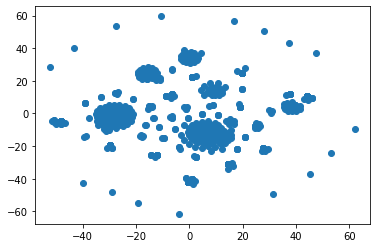

In [16]:
crypto_data['x'] = transformed_features[:,0]
crypto_data['y'] = transformed_features[:,1]

plt.scatter(crypto_data['x'], crypto_data['y'])
plt.show()

## Cluster analysis with k-means

In [17]:
#Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k 
#between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it 
#appears.

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_data)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,486043.500000
1,2,289702.906250
2,3,182038.500000
3,4,119021.078125
4,5,97380.843750
5,6,79433.804688
6,7,69688.164062
7,8,62212.179688
8,9,53911.019531
9,10,47393.343750


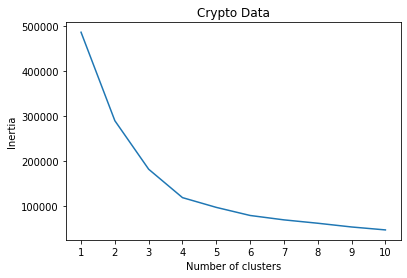

In [18]:
#Create graph
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Crypto Data')
plt.show()

## Recommendation 

In [19]:
#Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be 
#clustered together? If so, into how many clusters?

There appear to be distinct clusters, and looking at the elbow curve you can see the bend at the 4.
My reccomendation therefore would be that the company can group these together according to the data, otherwise the others aren't "similar" enough to be classified or grouped together with this model.